<a href="https://colab.research.google.com/github/Tulasipotu08/hackathon/blob/main/HOUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [70]:
df=pd.read_csv('/content/Housing (1).csv')

In [71]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [72]:
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [74]:
df.shape

(5000, 7)

In [75]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [76]:
df.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [77]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 1
Integer variables: 0
Float variables: 6


In [78]:
a=df.drop(['Avg. Area House Age'],axis=1,inplace=True)

In [79]:
df.head()

,Avg. Area Income,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [80]:
df.columns

Index(['Avg. Area Income', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

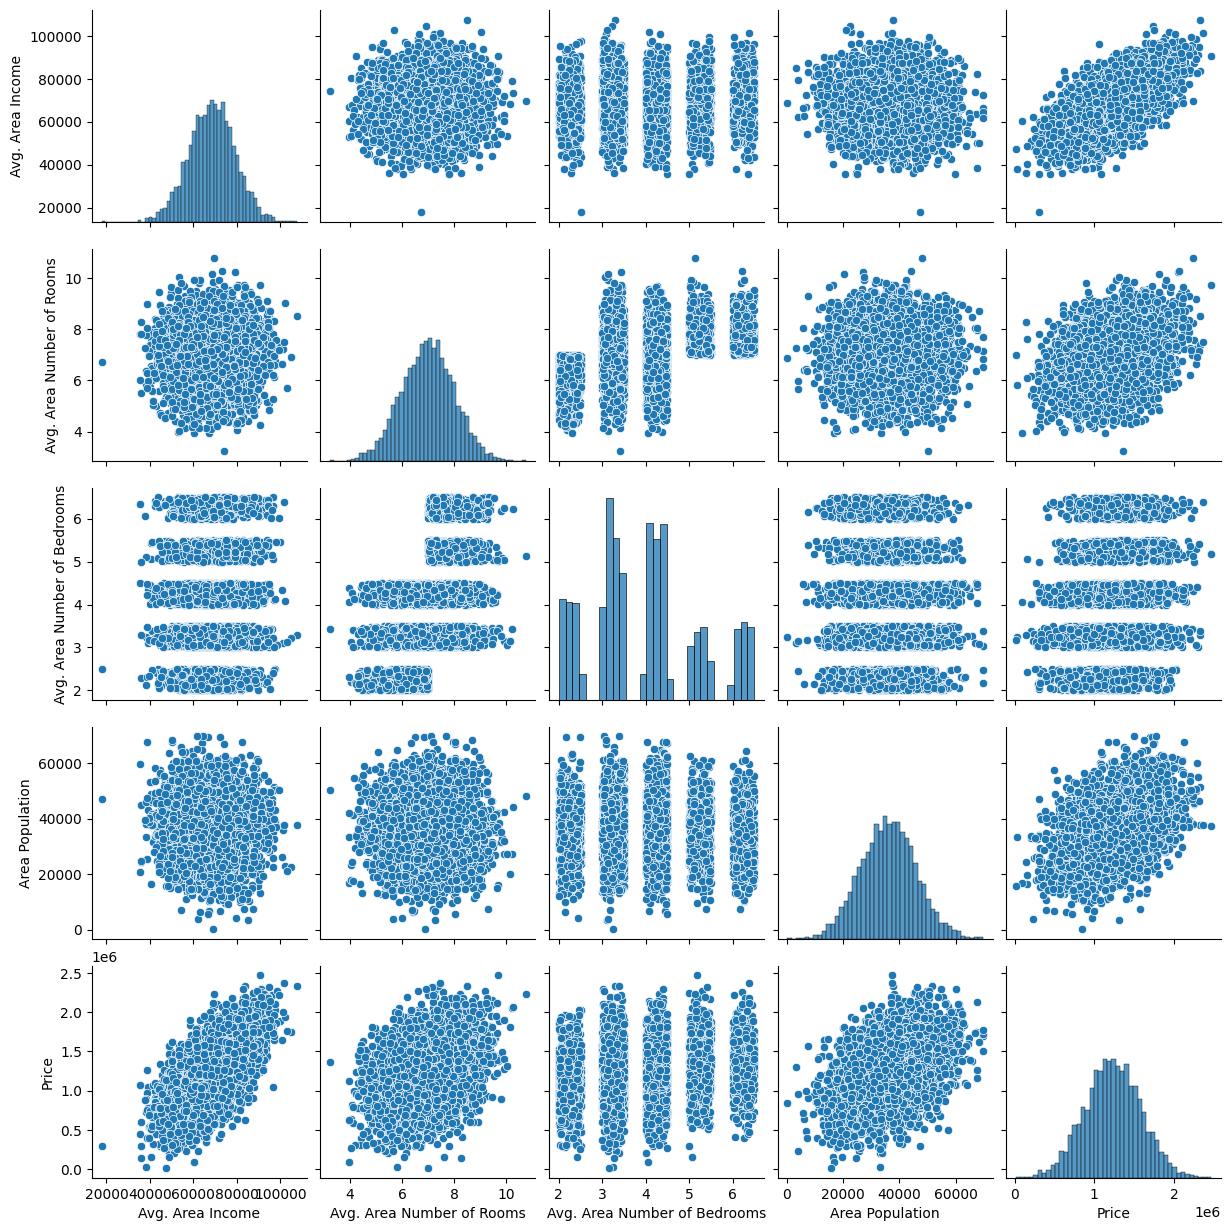

In [81]:
sns.pairplot(df)

<ipython-input-82-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

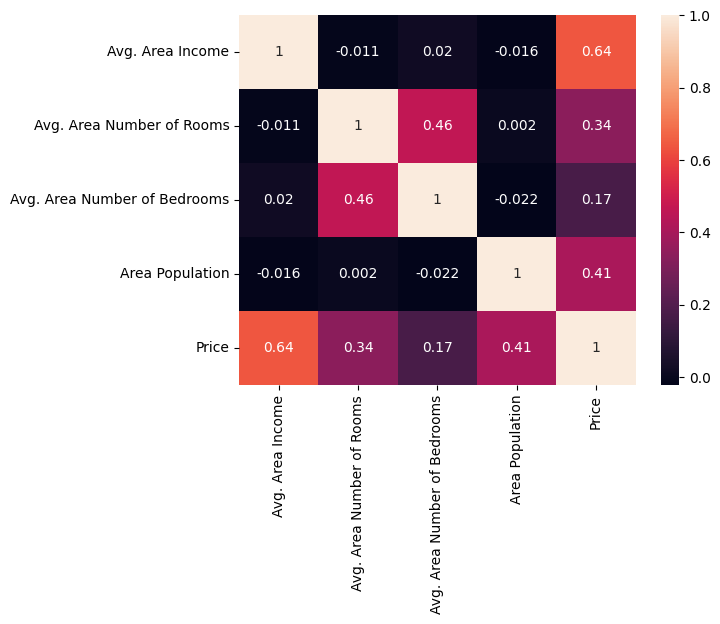

In [82]:
sns.heatmap(df.corr(),annot=True)

In [83]:
selected_feature=['Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']

In [84]:
df.dropna()

,Avg. Area Income,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...
4995,60567.944140,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [85]:
s=(df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables")
print(object_cols)
print('No.of.categorical features: ',len(object_cols))

Categorical variables
['Address']
No.of.categorical features:  1


In [86]:
OH_encoder=OneHotEncoder(sparse=False)
OH_cols=pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index=df.index
OH_cols.columns=OH_encoder.get_feature_names_out()
df_final=df.drop(object_cols, axis=1)
df_final=pd.concat([df_final,OH_cols], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [87]:
selected_feature=['Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']

In [88]:
X=df_final.drop(selected_feature,axis=1).astype(float)
y=df['Price'].astype(float)

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [90]:
X_train

,Avg. Area Income,Price,"Address_000 Adkins Crescent\nSouth Teresa, AS 49642-1348","Address_000 Todd Pines\nAshleyberg, KY 90207-1179","Address_001 Steve Plaza\nJessicastad, UT 25190","Address_0010 Gregory Loaf\nSouth Ericfort, VA 34651-0718","Address_00149 Raymond Knolls\nNew Jason, UT 75026","Address_002 Katherine Flat\nHartmanland, AZ 37973-3049","Address_0022 Young Rest\nLake Kevin, CA 25438-1821","Address_0029 Melinda Neck Apt. 591\nLake Gregoryshire, HI 60267",...,Address_Unit 9446 Box 0958\nDPO AE 97025,Address_Unit 9463 Box 0963\nDPO AE 49984-2796,Address_Unit 9494 Box 2307\nDPO AE 58622,Address_Unit 9664 Box 1605\nDPO AA 30902,Address_Unit 9732 Box 1846\nDPO AE 69898-3304,Address_Unit 9774 Box 4511\nDPO AE 44963,Address_Unit 9778 Box 2114\nDPO AP 59374,Address_Unit 9785 Box 0790\nDPO AP 60371-0797,Address_Unit 9831 Box 7128\nDPO AA 54705,Address_Unit 9871 Box 9037\nDPO AP 37275-9289
2913,80196.242251,1.616937e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3275,74130.606324,1.881075e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
775,67384.000373,1.930344e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
217,59569.537340,8.859206e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,58385.215373,1.266210e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4931,77622.958116,1.599997e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3264,80051.847123,1.354609e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1653,67094.197072,1.202993e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2607,52541.319847,8.429859e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [91]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_svm=svm.SVR()
model_svm.fit(X_train,y_train)
y_pred=model_svm.predict(X_test)

print(mean_absolute_percentage_error(y_test,y_pred))

0.2859445825671071


In [92]:
from sklearn.ensemble import RandomForestRegressor

model_RFR=RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train,y_train)
y_pred=model_RFR.predict(X_test)

(mean_absolute_percentage_error(y_test,y_pred))

0.0004627851401272729

In [93]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [94]:
y_pred=model.predict(X_test)
mse=mean_absolute_error(y_test,y_pred)
print("Mean Absolute Error:",mse)

Mean Absolute Error: 6.421760190278292e-10


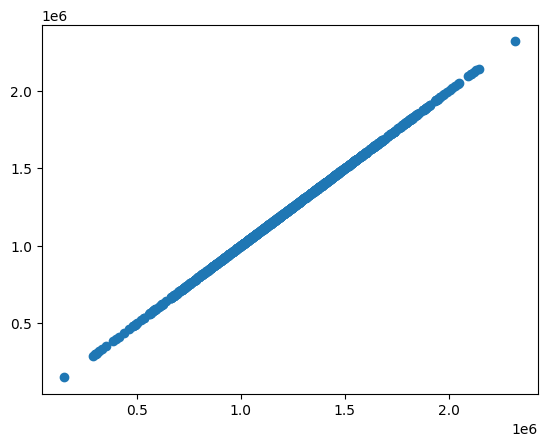

In [95]:
plt.scatter(y_test,y_pred)